## We are going to solve a customer classification Problem. The problem can be summarized as below:

1. Given the details about the customer our objective is to identify which customers is a potential high revenue customers and which customers are low revenue customers for a stock brocking firm
2. The problem is a supervised classification problem

Machine Learning Pipleline:

1. Load the Data into python
2. Split the data into train and val (only when validation set is not provided separately)
3. Exploratory Data Analysis and Preprocessing
4. Model Building
5. Model Evaluation
6. Iter over to improve the performance

In [87]:
###### Importing Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, f1_score
from sklearn.preprocessing import StandardScaler

## Load the Dataset

In [88]:
raw_data = pd.read_csv('drive/MyDrive/CustomerClassification/Existing_Base.csv')

In [89]:
###### Info gives details about the data #####

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           10155 non-null  int64  
 1   children                         10155 non-null  object 
 2   age_band                         10155 non-null  object 
 3   status                           10155 non-null  object 
 4   occupation                       10155 non-null  object 
 5   occupation_partner               10155 non-null  object 
 6   home_status                      10155 non-null  object 
 7   family_income                    10155 non-null  object 
 8   self_employed                    10155 non-null  object 
 9   self_employed_partner            10155 non-null  object 
 10  year_last_moved                  10155 non-null  int64  
 11  TVarea                           10155 non-null  object 
 12  post_code         

In [90]:
##### Check the class imbalance in the data. This is a common problem in classification problem
##### This tells us that our data has class imbalance

raw_data['Revenue Grid'].value_counts(normalize=True)

2    0.893058
1    0.106942
Name: Revenue Grid, dtype: float64

## Split the data into training and validation set
We would use sklearn's `train_test_split` functionality for the same.

In [91]:
targets = raw_data['Revenue Grid']
features = raw_data.drop(['Revenue Grid'], axis=1)  ## This line drops Revenue Grid from the data


features_train, features_val, target_train, target_val = train_test_split(
      features, targets, test_size=0.2, random_state=42, stratify=targets)

### Store all features_train, features_val, target_val, trarget_train

In [92]:
features_train.reset_index(drop=True, inplace=True)
features_val.reset_index(drop=True, inplace=True)
target_train.reset_index(drop=True, inplace=True)
target_val.reset_index(drop=True, inplace=True)

In [93]:
features_val.to_csv('drive/MyDrive/CustomerClassification/features_val.csv', index=None)
target_val.to_csv('drive/MyDrive/CustomerClassification/target_val.csv', index=None)

In [94]:
features_train.shape, features_val.shape

((8124, 31), (2031, 31))

In [95]:
target_val.value_counts(normalize=True)

2    0.893156
1    0.106844
Name: Revenue Grid, dtype: float64

## Explore the data!!!

1. Missing value imputations
2. Convert all non numeric to numeric columns
3. If there are any additional issues with the data

In [96]:
##### Get the head of the data #####
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
features_train.head(20)

<ipython-input-96-54a650fc0b73>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,6756,2,31-35,Partner,Housewife,Other,Own Home,">=35,000",No,No,1988,Granada,WA4 4QG,WA4,64.48,29.49,9.99,47.96,7.49,18.46,5.99,19.98,0.00,8.99,0.00,Female,North West,31.88,8.90,16.65,53.28
1,5618,1,31-35,Partner,Housewife,Professional,Own Home,"<30,000, >=27,500",No,No,1995,Carlton,CM16 6DW,CM16,0.00,174.47,21.48,97.94,52.16,34.93,0.00,89.43,5.98,7.98,0.00,Female,South East,69.21,23.05,46.74,127.76
2,6486,2,31-35,Partner,Housewife,Professional,Own Home,"<27,500, >=25,000",No,No,1987,Ulster,BT23 7BN,BT23,30.48,19.49,0.52,50.94,21.98,5.99,11.99,17.48,4.99,0.00,0.00,Female,Northern Ireland,24.68,6.74,18.90,62.98
3,4557,1,51-55,Partner,Housewife,Professional,Own Home,">=35,000",No,Yes,1982,Central,B45 8LX,B45,0.01,0.00,0.00,0.00,0.00,0.00,111.95,0.00,0.00,0.00,0.00,Female,West Midlands,0.00,18.66,18.66,48.14
4,2450,3,26-30,Partner,Other,Manual Worker,Own Home,"<25,000, >=22,500",No,No,1988,Granada,WA5 1XU,WA5,0.00,0.03,0.00,192.85,0.00,71.97,0.00,48.43,0.00,0.00,0.00,Female,North West,38.58,20.07,52.21,132.89
5,821,2,26-30,Partner,Other,Professional,Own Home,"<27,500, >=25,000",Yes,No,1987,Granada,FY5 2ER,FY5,0.00,79.47,0.00,61.47,0.00,29.99,0.00,11.99,0.00,9.98,0.00,Male,North West,28.19,8.66,17.24,79.22
6,10382,Zero,31-35,Single/Never Married,Secretarial/Admin,Unknown,Own Home,"<27,500, >=25,000",No,No,1997,Scottish TV,EH26 0QU,EH26,0.00,0.00,19.99,9.49,0.00,8.99,0.00,0.00,0.00,0.00,0.00,Female,Scotland,5.90,1.50,3.08,-10.51
7,8316,Zero,51-55,Widowed,Retired,Unknown,Own Home,"< 4,000",No,No,1993,Yorkshire,YO13 9LR,YO13,0.00,29.47,10.00,11.94,4.99,9.43,0.00,10.95,0.00,0.00,0.00,Female,Unknown,11.28,3.40,6.22,-9.31
8,10196,Zero,41-45,Partner,Housewife,Unknown,Own Home,"<10,000, >= 8,000",No,Yes,1993,HTV,SN15 4HD,SN15,74.40,34.47,0.01,64.94,64.45,129.93,0.00,98.91,0.00,21.46,0.00,Female,South West,47.65,41.72,59.71,176.27
9,5374,Zero,31-35,Partner,Housewife,Manual Worker,Own Home,"<15,000, >=12,500",No,No,1984,Granada,LA9 7LR,LA9,0.00,0.00,0.00,0.52,0.00,4.49,0.00,0.00,0.00,0.00,0.00,Female,North,0.10,0.75,0.84,-51.04


In [97]:
#### Lets get info on our columns #####

features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

In [98]:
####### Analysis of the columns ########
####### Lets analyze numeric columns ######

features_train.describe()

,REF_NO,year_last_moved,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,5747.221196,1968.430822,23.536013,45.848500,26.857107,64.896397,18.816137,31.832499,25.705244,41.928358,6.055491,4.401269,19.354365,35.991018,21.546958,31.539849,89.368669
std,3321.553236,179.942993,51.008213,79.870499,53.022363,94.681534,32.094002,45.166539,88.237940,64.665153,12.737090,9.809771,93.045927,42.117391,32.826080,39.877961,108.716211
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-77.230000
25%,2880.500000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.090000,4.500000,8.500000,26.375000
50%,5729.500000,1988.000000,0.000000,16.975000,0.000000,30.000000,0.010000,14.990000,0.000000,23.470000,0.000000,0.000000,0.000000,23.790000,12.820000,20.895000,65.385000
75%,8630.500000,1994.000000,23.980000,64.970000,34.490000,92.932500,26.970000,45.952500,20.980000,59.460000,5.490000,4.490000,7.980000,50.127500,27.962500,42.392500,125.015000
max,11516.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.930000,2561.270000,138.560000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000


<ipython-input-99-63533c949b12>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features_train['Average Credit Card Transaction'])


<Axes: xlabel='Average Credit Card Transaction', ylabel='Density'>

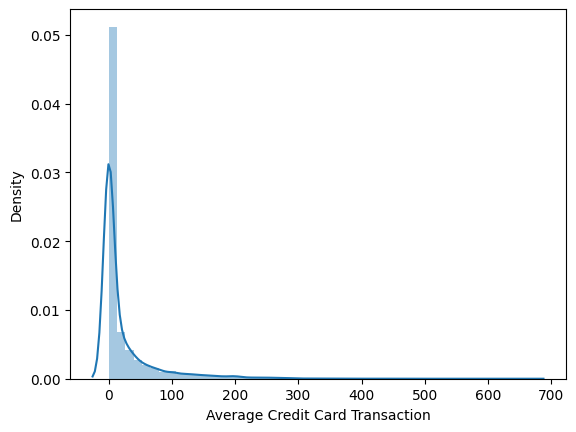

In [99]:
sns.distplot(features_train['Average Credit Card Transaction'])

<Axes: xlabel='Revenue Grid', ylabel='Online Purchase Amount'>

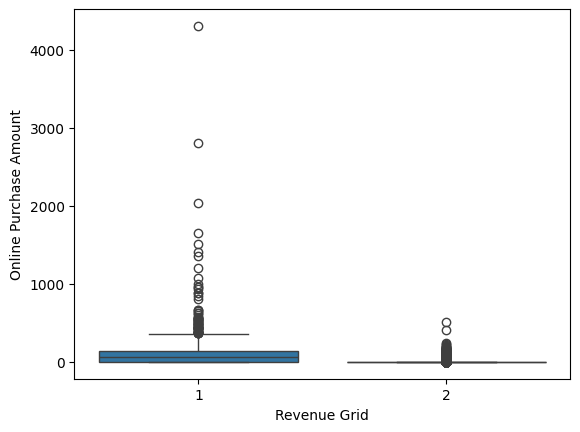

In [100]:
sns.boxplot(x=target_train,y=features_train['Online Purchase Amount'])

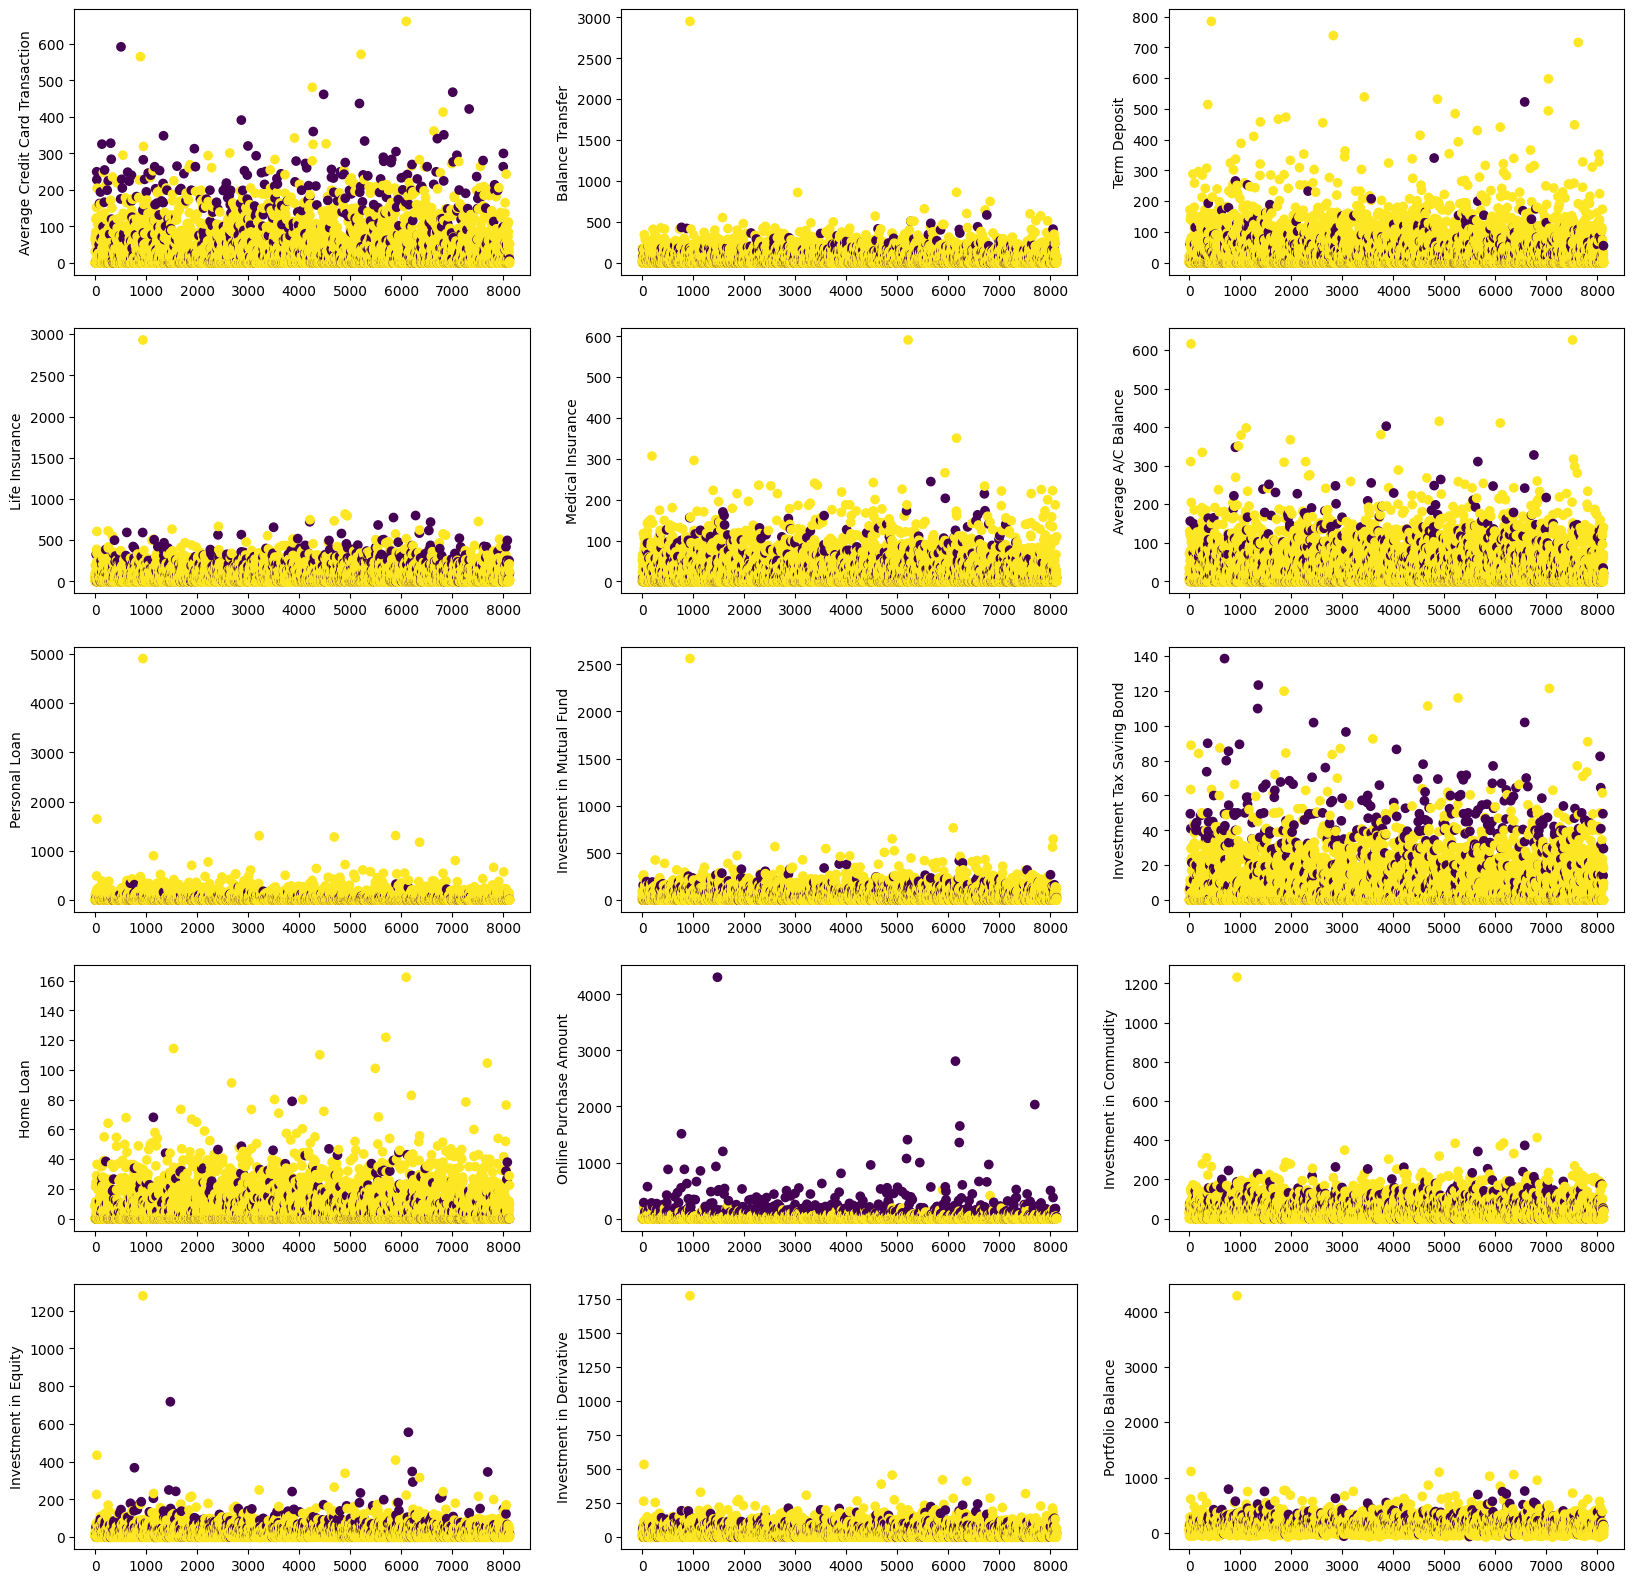

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

numeric_cols = features_train.select_dtypes(include = np.number) ### selects numeric columns
numeric_cols.drop(['REF_NO', 'year_last_moved'], axis=1, inplace=True)

#numeric_cols = numeric_cols.loc[numeric_cols['Balance Transfer']<2500, :]

#target_train = target_train.drop([937])


column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 5
plot_cols = 3

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index, c= target_train)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1


In [102]:
features_train.drop([937], axis=0, inplace=True)
target_train.drop([937], inplace=True)

features_train.reset_index(drop=True, inplace=True)
target_train.reset_index(drop=True, inplace=True)

In [103]:
target_train.shape

(8123,)

In [104]:
####### Understand the Object columns ########

##### Understanding the children column #####

### How many unique values
### What is the distribution of each unique values

train_uniq_values = {}

def children_numeric_converter(children_data, unique_values):
  children_data[~(children_data.isin(unique_values))] = "Zero" # This replaces every other value to Zero
  children_data[children_data=='Zero'] = 0  # Converts Zero to numeric 0
  children_data[children_data=='4+'] = 4    # Converts 4+ to 4
  children_data = pd.to_numeric(children_data) # Converts children_data to numeric
  return children_data


features_train['children'].nunique()

features_train['children'].value_counts()

uniq_values = features_train['children'].unique()

children_numeric = children_numeric_converter(features_train['children'], uniq_values)

features_train.drop(['children'], axis=1, inplace=True) ### drops the children column

features_train['children'] = children_numeric

train_uniq_values['children'] = uniq_values.tolist()

<ipython-input-104-b595c7c70012>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_data[~(children_data.isin(unique_values))] = "Zero" # This replaces every other value to Zero
<ipython-input-104-b595c7c70012>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_data[children_data=='Zero'] = 0  # Converts Zero to numeric 0
<ipython-input-104-b595c7c70012>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_data[ch

In [105]:
###### Analyzing the Post code column ######
columns_to_remove = []

features_train['post_code'].nunique()
features_train['post_area'].nunique()

## Gives me an impression that I can drop this column

features_train.drop(['post_code', 'post_area', 'REF_NO'], axis=1, inplace=True)
columns_to_remove.extend(['post_code', 'post_area', 'REF_NO'])


In [106]:
###### Analyzing the Age band columns ######

def ageband_numeric_converter(ageband_data, uniq_values):

  def __split(x):
    splits = x.split('-')
    left_val = splits[0]
    right_val = splits[1]
    mean = (float(left_val) + float(right_val))/2
    return mean

  ageband_data[~(ageband_data.isin(uniq_values))] = '45-50'
  ageband_data[ageband_data=='71+'] = '71-75'
  ageband_data[ageband_data=='Unknown'] = '45-50'
  mean_vals = ageband_data.apply(__split)
  return mean_vals


features_train['age_band'].nunique()

features_train['age_band']. value_counts()

ageband_unique = features_train['age_band'].unique()

numeric_age_band = ageband_numeric_converter(features_train['age_band'], ageband_unique)

features_train.drop(['age_band'], axis=1)

features_train['age_band'] = numeric_age_band

train_uniq_values['age_band'] = ageband_unique.tolist()

<ipython-input-106-4bfd66504c88>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageband_data[~(ageband_data.isin(uniq_values))] = '45-50'
<ipython-input-106-4bfd66504c88>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageband_data[ageband_data=='71+'] = '71-75'
<ipython-input-106-4bfd66504c88>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageband_data[ageband_data=='Unknown'] = '45-50'


In [107]:
###### Analyzing the Gender column #######

def gender_numeric_converter(gender_data, uniq_values):
  gender_data[~(gender_data.isin(uniq_values))] = 'Female'
  gender_data[gender_data=='Unknown'] = 'Female'
  gender_data[gender_data=='Male'] = 0
  gender_data[gender_data=='Female'] = 1
  gender_data = pd.to_numeric(gender_data)
  return gender_data

features_train['gender'].value_counts()

gender_uniq = features_train['gender'].unique()

gender_numeric = gender_numeric_converter(features_train['gender'], gender_uniq)

features_train.drop(['gender'], axis=1, inplace=True)

features_train['gender'] = gender_numeric

train_uniq_values['gender'] = gender_uniq.tolist()

<ipython-input-107-071f84836c49>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_data[~(gender_data.isin(uniq_values))] = 'Female'
<ipython-input-107-071f84836c49>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_data[gender_data=='Unknown'] = 'Female'
<ipython-input-107-071f84836c49>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_data[gender_data=='Male'] = 0
<ipython-input-107-071f84836c49>:7: SettingWithCopyW

In [108]:
missing_value_replacement = {}
missing_value_replacement['status'] = ['Partner']
missing_value_replacement['occupation'] = ['Professional']
missing_value_replacement['occupation_partner'] = ['Unknown', 'Professional']
missing_value_replacement['home_status'] = ['Own Home']
missing_value_replacement['self_employed'] = ["No"]
missing_value_replacement['self_employed_partner'] = ["No"]
missing_value_replacement['TVarea'] = ["Central", "Carlton", "Meridian"]
missing_value_replacement['region'] = ["South East"]
missing_value_replacement['family_income'] = [">=35,000"]
missing_value_replacement['Average Credit Card Transaction'] = [0.0]
missing_value_replacement['Balance Transfer'] = [16.975]
missing_value_replacement['Life Insurance'] = [30.0]
missing_value_replacement['Medical Insurance'] = [0.0]
missing_value_replacement['Average A/C Balance'] = [15.00]
missing_value_replacement['Personal Loan'] = [0.0]
missing_value_replacement['Investment in Mutual Fund'] = [23.47]
missing_value_replacement['Investment Tax Saving Bond'] = [0.0]
missing_value_replacement['Home Loan'] = [0.0]
missing_value_replacement['Online Purchase Amount'] = [0.0]
missing_value_replacement['Investment in Commudity'] = [23.79]
missing_value_replacement['Investment in Equity'] = [12.82]
missing_value_replacement['Investment in Derivative'] = [20.89]
missing_value_replacement['Portfolio Balance'] = [65.38]

In [109]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age_band                         8123 non-null   float64
 1   status                           8123 non-null   object 
 2   occupation                       8123 non-null   object 
 3   occupation_partner               8123 non-null   object 
 4   home_status                      8123 non-null   object 
 5   family_income                    8123 non-null   object 
 6   self_employed                    8123 non-null   object 
 7   self_employed_partner            8123 non-null   object 
 8   year_last_moved                  8123 non-null   int64  
 9   TVarea                           8123 non-null   object 
 10  Average Credit Card Transaction  8123 non-null   float64
 11  Balance Transfer                 8123 non-null   float64
 12  Term Deposit        

In [110]:
features_train['self_employed'].value_counts()

No     7540
Yes    583 
Name: self_employed, dtype: int64

In [111]:
##### Analysing the Status column ######

one_hot_converted_columns = ['status', 'occupation', 'occupation_partner', 'home_status', 'self_employed', 'self_employed_partner', 'TVarea', 'region', 'family_income']

encoder = OneHotEncoder()

encoder.fit(features_train[one_hot_converted_columns]) ### Identifying and storing the unique values for each column

encoded_data = pd.DataFrame(encoder.transform(features_train[one_hot_converted_columns]).toarray())

encoded_data.columns = encoder.get_feature_names_out()

features_train.drop(one_hot_converted_columns, axis=1, inplace=True)

features_train = pd.concat([features_train, encoded_data], axis=1)


In [112]:
##### Analysing the year last moved column #####
columns_to_remove.append('year_last_moved')
features_train.drop(['year_last_moved'], axis=1, inplace=True)

In [113]:
features_train.head()

,age_band,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance,children,gender,status_Divorced/Separated,status_Partner,status_Single/Never Married,status_Unknown,status_Widowed,occupation_Business Manager,occupation_Housewife,occupation_Manual Worker,occupation_Other,occupation_Professional,occupation_Retired,occupation_Secretarial/Admin,occupation_Student,occupation_Unknown,occupation_partner_Business Manager,occupation_partner_Housewife,occupation_partner_Manual Worker,occupation_partner_Other,occupation_partner_Professional,occupation_partner_Retired,occupation_partner_Secretarial/Admin,occupation_partner_Student,occupation_partner_Unknown,home_status_Live in Parental Hom,home_status_Own Home,home_status_Rent Privately,home_status_Rent from Council/HA,home_status_Unclassified,self_employed_No,self_employed_Yes,self_employed_partner_No,self_employed_partner_Yes,TVarea_Anglia,TVarea_Border,TVarea_Carlton,TVarea_Central,TVarea_Grampian,TVarea_Granada,TVarea_HTV,TVarea_Meridian,TVarea_Scottish TV,TVarea_TV South West,TVarea_Tyne Tees,TVarea_Ulster,TVarea_Unknown,TVarea_Yorkshire,region_Channel Islands,region_East Anglia,region_East Midlands,region_Isle of Man,region_North,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Unknown,region_Wales,region_West Midlands,"family_income_< 4,000","family_income_< 8,000, >= 4,000","family_income_<10,000, >= 8,000","family_income_<12,500, >=10,000","family_income_<15,000, >=12,500","family_income_<17,500, >=15,000","family_income_<20,000, >=17,500","family_income_<22,500, >=20,000","family_income_<25,000, >=22,500","family_income_<27,500, >=25,000","family_income_<30,000, >=27,500","family_income_>=35,000",family_income_Unknown
0,33.0,64.48,29.49,9.99,47.96,7.49,18.46,5.99,19.98,0.00,8.99,0.0,31.88,8.90,16.65,53.28,2,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,33.0,0.00,174.47,21.48,97.94,52.16,34.93,0.00,89.43,5.98,7.98,0.0,69.21,23.05,46.74,127.76,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,33.0,30.48,19.49,0.52,50.94,21.98,5.99,11.99,17.48,4.99,0.00,0.0,24.68,6.74,18.90,62.98,2,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,53.0,0.01,0.00,0.00,0.00,0.00,0.00,111.95,0.00,0.00,0.00,0.0,0.00,18.66,18.66,48.14,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28.0,0.00,0.03,0.00,192.85,0.00,71.97,0.00,48.43,0.00,0.00,0.0,38.58,20.07,52.21,132.89,3,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [114]:
features_train['age_band'].nunique()

12

In [115]:
#### Features scaling ########

all_columns = features_train.columns

columns_to_scale = []

for column in all_columns:
  if features_train[column].nunique()>2:
    columns_to_scale.append(column)

scaler = StandardScaler()

scaler.fit(features_train[columns_to_scale])

scaled_columns = pd.DataFrame(scaler.transform(features_train[columns_to_scale]), columns=columns_to_scale)

features_train.drop(columns_to_scale, axis=1, inplace=True)

features_train = pd.concat([features_train, scaled_columns], axis=1)


In [118]:
with open('column_sequence.pickle', 'wb') as f:
  pickle.dump(list(features_train.columns), f)

In [119]:
###### We need to keep in mind that missing values could be present in the validation and Testing set

### Store the names of the columns we removed
### Store the unique values in the columns
### Store the onehot encoder object

with open('columns_to_remove.pickle', 'wb') as f:
  pickle.dump(columns_to_remove, f)

with open('column_unique_values.pickle', 'wb') as f:
  pickle.dump(train_uniq_values, f)

with open('column_encoder.pickle', 'wb') as f:
  pickle.dump(encoder, f)

with open('features_scaler.pickle', 'wb') as f:
  pickle.dump(scaler, f)

with open('missing_value_replacement.pickle', 'wb') as f:
  pickle.dump(missing_value_replacement, f)

In [120]:
####### Validation set preprocessing ##########

#### Load the required files

with open('column_encoder.pickle', 'rb') as f:
  encoder = pickle.load(f)

with open('column_unique_values.pickle', 'rb') as f:
  uniq_values = pickle.load(f)

with open('columns_to_remove.pickle', 'rb') as f:
  cols_to_remove = pickle.load(f)

with open('missing_value_replacement.pickle', 'rb') as f:
  missing_replacement = pickle.load(f)

with open('column_sequence.pickle', 'rb') as f:
  column_seq = pickle.load(f)

with open('features_scaler.pickle', 'rb') as f:
  scaler = pickle.load(f)


### Initialize the required predefined functions

def children_numeric_converter(children_data, unique_values):
  children_data[~(children_data.isin(unique_values))] = "Zero" # This replaces every other value to Zero
  children_data[children_data=='Zero'] = 0  # Converts Zero to numeric 0
  children_data[children_data=='4+'] = 4    # Converts 4+ to 4
  children_data = pd.to_numeric(children_data) # Converts children_data to numeric
  return children_data

def ageband_numeric_converter(ageband_data, uniq_values):

  def __split(x):
    splits = x.split('-')
    left_val = splits[0]
    right_val = splits[1]
    mean = (float(left_val) + float(right_val))/2
    return mean

  ageband_data[~(ageband_data.isin(uniq_values))] = '45-50'
  ageband_data[ageband_data=='71+'] = '71-75'
  ageband_data[ageband_data=='Unknown'] = '45-50'
  mean_vals = ageband_data.apply(__split)
  return mean_vals

def gender_numeric_converter(gender_data, uniq_values):
  gender_data[~(gender_data.isin(uniq_values))] = 'Female'
  gender_data[gender_data=='Unknown'] = 'Female'
  gender_data[gender_data=='Male'] = 0
  gender_data[gender_data=='Female'] = 1
  gender_data = pd.to_numeric(gender_data)
  return gender_data


### Preprocessing function

def preprocess_val_test(data):
  ### Drop columns ####
  for column in cols_to_remove:
    data.drop([column], axis=1, inplace=True)

  children_uniq = uniq_values['children']
  children_numeric = children_numeric_converter(data['children'], children_uniq)
  data.drop(['children'], axis=1, inplace=True)
  data['children'] = children_numeric

  ageband_uniq = uniq_values['age_band']
  ageband_numeric = ageband_numeric_converter(data['age_band'], ageband_uniq)
  data.drop(['age_band'], axis=1, inplace=True)
  data['age_band'] = ageband_numeric

  gender_uniq = uniq_values['gender']
  gender_numeric = gender_numeric_converter(data['gender'], gender_uniq)
  data.drop(['gender'], axis=1, inplace=True)
  data['gender'] = gender_numeric

  ### Missing value Imputation ######
  missing_value_columns = list(data.isnull().sum()[data.isnull().sum()>0].index)

  for column in missing_value_columns:
    replacement_values = missing_replacement[column]
    if len(replacement_values) != 1:
      replace_with = np.random.choice(replacement_values, data[column].isnull().sum())
    else:
      replace_with = replacement_values[0]
    data[data[column].isnull(), column] = replace_with


  #### One hot encoding ######
  one_hot_converted_columns = ['status', 'occupation', 'occupation_partner', 'home_status', 'self_employed', 'self_employed_partner', 'TVarea', 'region', 'family_income']
  encoded_data = pd.DataFrame(encoder.transform(data[one_hot_converted_columns]).toarray())
  encoded_data.columns = encoder.get_feature_names_out()
  data.drop(one_hot_converted_columns, axis=1, inplace=True)
  data = pd.concat([data, encoded_data], axis=1)

  ##### Feature scaling ######
  columns_to_scale = list(scaler.feature_names_in_)
  scaled_columns = pd.DataFrame(scaler.transform(data[columns_to_scale]), columns=columns_to_scale)
  data.drop(columns_to_scale, axis=1, inplace=True)
  data = pd.concat([data, scaled_columns], axis=1)

  ### Ensure that the column ordering and the columns are same #####
  data = data[column_seq]

  return data

In [121]:
features_val = preprocess_val_test(features_val)

<ipython-input-120-c23f2aae7977>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_data[~(children_data.isin(unique_values))] = "Zero" # This replaces every other value to Zero
<ipython-input-120-c23f2aae7977>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_data[children_data=='Zero'] = 0  # Converts Zero to numeric 0
<ipython-input-120-c23f2aae7977>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_data[ch

## Modelling

We are going to start with the basic model and them optimize the model to get the best performance!!

In [123]:
## Class 2 are low revenue customers and class 1 are high revenue customers
## We see that there exists a class imbalance
## Class Imbalance is a problem (90% are 2 and 10% are 1)

target_train.value_counts()

target_train[target_train==2] = 0
target_train[target_train==1] = 1

target_val[target_val==2] = 0
target_val[target_val==1] = 1

In [124]:
###### Simplest algorithm that comes to mind -  Logistic regression , KNN

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, solver="newton-cg", class_weight={0:1.1, 1:3})

lr.fit(features_train, target_train) ### Model training happens

LogisticRegression(class_weight={0: 1.1, 1: 3}, max_iter=1000,
                   solver='newton-cg')

In [125]:
##### Model prediction here ######

tr_pred = lr.predict(features_train) #### Training prediction
val_pred = lr.predict(features_val)

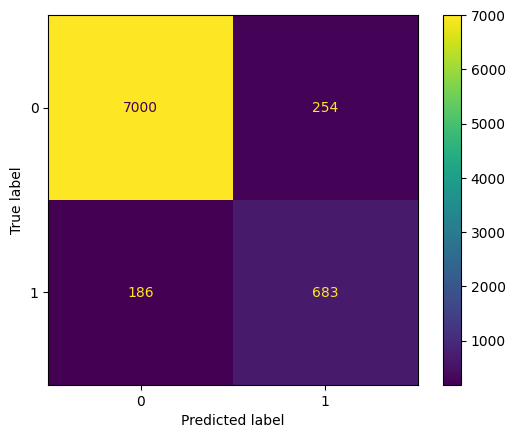

In [126]:
##### Models performance

from sklearn.metrics import ConfusionMatrixDisplay, f1_score

ConfusionMatrixDisplay.from_predictions(target_train, tr_pred)

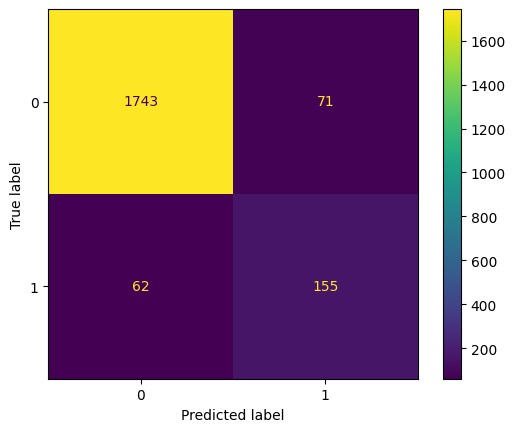

In [127]:
ConfusionMatrixDisplay.from_predictions(target_val, val_pred)

In [128]:
train_f1 = f1_score(target_train, tr_pred)
val_f1 = f1_score(target_val, val_pred)

print('Train F1 Score - {}'.format(train_f1))
print('Val F1 Score - {}'.format(val_f1))

#### Looking at the Train and Val F1 scores, we can safely say that the Logistic regression is an underfit model

Train F1 Score - 0.7563676633444075
Val F1 Score - 0.6997742663656885


In [130]:
###### K nearest neighbors ######

knn = KNeighborsClassifier(n_neighbors=5, weights="uniform", p=3)

knn.fit(features_train, target_train)

KNeighborsClassifier(p=3)

In [131]:
tr_pred = knn.predict(features_train)
val_pred = knn.predict(features_val)

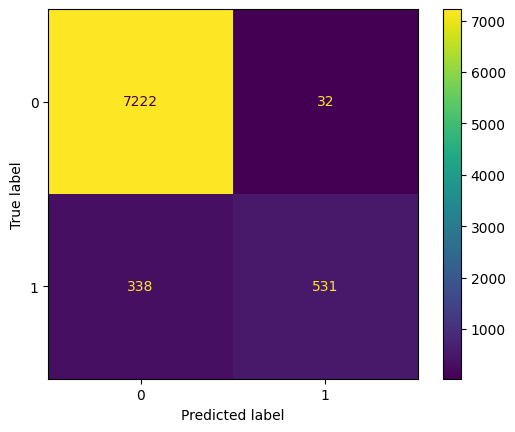

In [132]:
ConfusionMatrixDisplay.from_predictions(target_train, tr_pred)

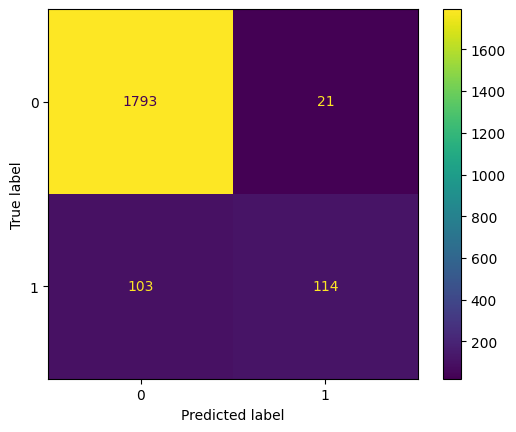

In [133]:
ConfusionMatrixDisplay.from_predictions(target_val, val_pred)

In [134]:
train_f1 = f1_score(target_train, tr_pred)
val_f1 = f1_score(target_val, val_pred)

print('Train F1 Score - {}'.format(train_f1))
print('Val F1 Score - {}'.format(val_f1))

Train F1 Score - 0.7416201117318436
Val F1 Score - 0.6477272727272727


In [135]:
##### Random Forest #########

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10,
                             n_estimators=1000,
                             class_weight={0:1.2, 1:4},
                             min_samples_split=70,
                             min_samples_leaf=1)

clf.fit(features_train, target_train)

RandomForestClassifier(class_weight={0: 1.2, 1: 4}, max_depth=10,
                       min_samples_split=70, n_estimators=1000)

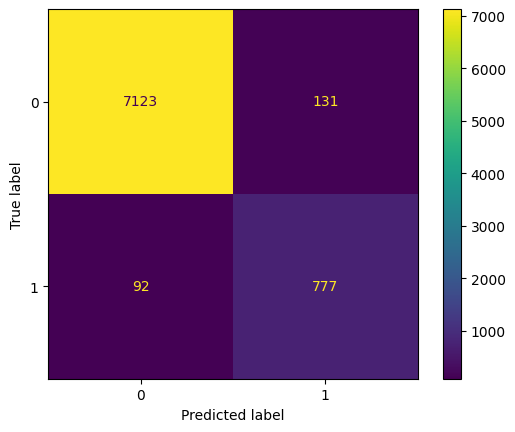

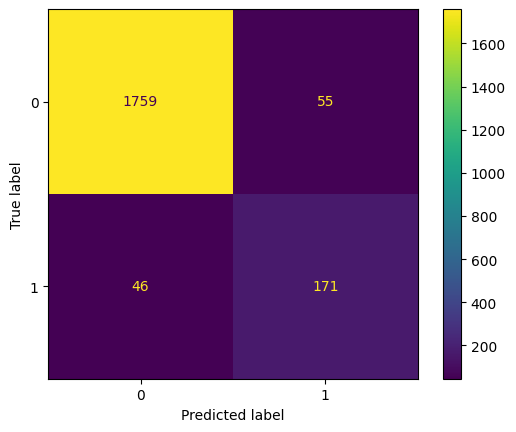

In [ ]:
tr_pred = clf.predict(features_train) #### Training prediction
val_pred = clf.predict(features_val)

ConfusionMatrixDisplay.from_predictions(target_train, tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val, val_pred)

In [ ]:
train_f1 = f1_score(target_train, tr_pred)
val_f1 = f1_score(target_val, val_pred)

print('Train F1 Score - {}'.format(train_f1))
print('Val F1 Score - {}'.format(val_f1))

Train F1 Score - 0.8745075970737197
Val F1 Score - 0.7720090293453724


In [ ]:
#### Features with 99% importances #####
cum_imp = 0
threshold = 0.98
imp_features = []

for feature_imp in sorted_importances:
  if cum_imp + feature_imp[1] >=threshold:
    break
  else:
    cum_imp = cum_imp + feature_imp[1]
    imp_features.append(feature_imp[0])

In [ ]:
##### Ensembling ########

## HyperParameter Tuning

1. Hyperparameter tuning is a way of tuning the hyperparamaters to find the best combination of them.
2. `GridsearchCV` of sklearn helps us in performing hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

params_grid = {
    "n_estimators":[500],
    "max_depth": [8,11,13,None],
    "min_samples_split":[50, 75, 100],
    "max_features":["sqrt", 0.5],
    "n_jobs": [-1],
    "class_weight": [{0:1,1:3}, {0:1, 1:4}, {0:0.9, 1:3.5}, {0:1.2, 1:4.2}]
}

grid_search_cv = GridSearchCV(
    estimator=rf,
    param_grid=params_grid,
    scoring='f1',
    cv=5,
    return_train_score=True
)

grid_search_cv.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 3}, {0: 1, 1: 4},
                                          {0: 0.9, 1: 3.5}, {0: 1.2, 1: 4.2}],
                         'max_depth': [8, 11, 13, None],
                         'max_features': ['sqrt', 0.5],
                         'min_samples_split': [50, 75, 100],
                         'n_estimators': [500], 'n_jobs': [-1]},
             return_train_score=True, scoring='f1')

In [ ]:
with open('drive/MyDrive/CustomerClassification/Gridsearchcv.pickle', 'wb') as f:
  pickle.dump(grid_search_cv, f)

In [2]:
##### Read the saved grid search cv object #######

with open('drive/MyDrive/CustomerClassification/Gridsearchcv.pickle', 'rb') as f:
  grid_search_cv = pickle.load(f)

In [23]:
results_df = pd.DataFrame({
    'Parameters': grid_search_cv.cv_results_['params'],
    'MeanTrainScore': grid_search_cv.cv_results_['mean_train_score'],
    'MeanTestScore': grid_search_cv.cv_results_['mean_test_score']})

In [25]:
results_df.to_csv('GridSearchPerformance.csv', index=None)

In [ ]:
##### Best performing Hyperparameter
## {'class_weight': {0: 1, 1: 3}, 'max_depth': None, 'max_features': 0.5, 'min_samples_split': 50, 'n_estimators': 500, 'n_jobs': -1}
## Avg Train score - 0.875, Avg Val Score - 0.812

In [41]:
bestrf = RandomForestClassifier(class_weight={0: 1, 1: 3},
                                max_depth=None,
                                max_features=0.5,
                                min_samples_split=50,
                                n_estimators=500)

bestrf.fit(features_train, target_train)

RandomForestClassifier(class_weight={0: 1, 1: 3}, max_features=0.5,
                       min_samples_split=50, n_estimators=500)

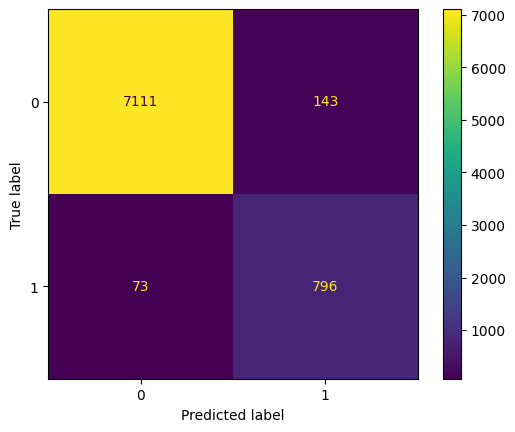

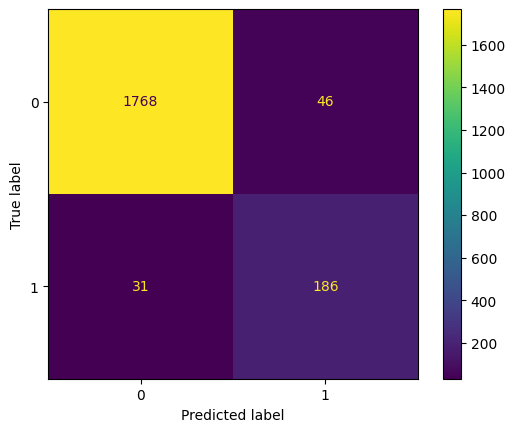

In [66]:
tr_pred = bestrf.predict(features_train) #### Training prediction
val_pred = bestrf.predict(features_val)

ConfusionMatrixDisplay.from_predictions(target_train, tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val, val_pred)

In [67]:
train_f1 = f1_score(target_train, tr_pred)
val_f1 = f1_score(target_val, val_pred)

print('Train F1 Score - {}'.format(train_f1))
print('Val F1 Score - {}'.format(val_f1))

Train F1 Score - 0.8805309734513275
Val F1 Score - 0.8285077951002228


In [72]:
feature_importances = bestrf.feature_importances_

feature_names = bestrf.feature_names_in_

sorted_idx = np.argsort(bestrf.feature_importances_)[::-1]

sorted_importances = [(feature_names[i], feature_importances[i]) for i in sorted_idx]

In [73]:
sorted_importances

[('Online Purchase Amount', 0.37935692983941277),
 ('Investment Tax Saving Bond', 0.12569839083107465),
 ('Average Credit Card Transaction', 0.1171254382566097),
 ('Life Insurance', 0.08154929408761855),
 ('Investment in Equity', 0.06809883220834394),
 ('Investment in Commudity', 0.0419539772566907),
 ('Personal Loan', 0.04163823335580901),
 ('Term Deposit', 0.030369396423956713),
 ('Investment in Derivative', 0.022543015454839457),
 ('Portfolio Balance', 0.021001541428178342),
 ('Average A/C Balance', 0.018396528607994914),
 ('Investment in Mutual Fund', 0.010859912106691676),
 ('Medical Insurance', 0.010734994849731932),
 ('Home Loan', 0.009011637157338432),
 ('Balance Transfer', 0.00818210561552093),
 ('age_band', 0.0014044228656935184),
 ('occupation_Manual Worker', 0.0005224876640967008),
 ('family_income_<12,500, >=10,000', 0.0005003914609638875),
 ('region_East Anglia', 0.00043045816737977534),
 ('occupation_Unknown', 0.0003855318516210448),
 ('TVarea_Unknown', 0.000365198800902

In [42]:
### Ensemble of classfiers

tr_pred_lr = lr.predict(features_train)
tr_pred_knn = knn.predict(features_train)
tr_pred_rf = bestrf.predict(features_train)

ensembled_tr_pred = []
for i in range(len(tr_pred_lr)):
  sum_preds = tr_pred_lr[i] +  tr_pred_knn[i] + tr_pred_rf[i]
  if sum>=2:
    ensembled_tr_pred.append(1)
  else:
    ensembled_tr_pred.append(0)

TypeError: sum() takes at most 2 arguments (3 given)

In [53]:
val_pred_lr = lr.predict(features_val)
val_pred_knn = knn.predict(features_val)
val_pred_rf = bestrf.predict(features_val)

ensembled_val_pred = []
for i in range(len(val_pred_lr)):
  sum_preds = val_pred_lr[i] +  val_pred_knn[i] + val_pred_rf[i]
  if sum_preds>=2:
    ensembled_val_pred.append(1)
  else:
    ensembled_val_pred.append(0)

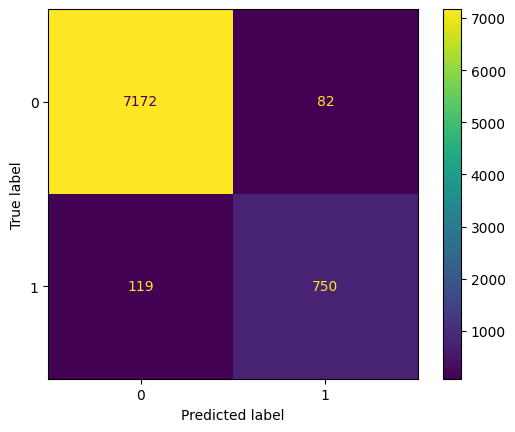

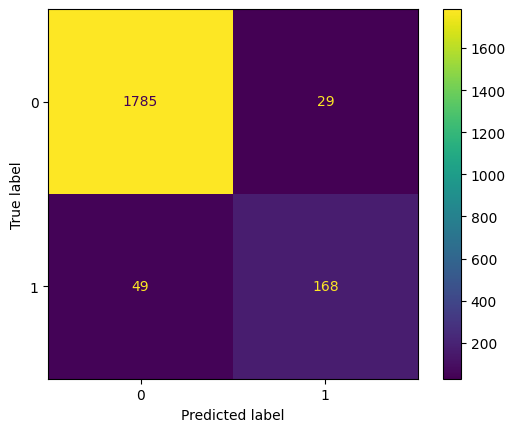

In [54]:
ConfusionMatrixDisplay.from_predictions(target_train, ensembled_tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val, ensembled_val_pred)

In [55]:
train_f1 = f1_score(target_train, ensembled_tr_pred)
val_f1 = f1_score(target_val, ensembled_val_pred)

print('Train F1 Score - {}'.format(train_f1))
print('Val F1 Score - {}'.format(val_f1))

Train F1 Score - 0.8818342151675486
Val F1 Score - 0.8115942028985506
